# Predicting Calories Burnt (Regression)

### Importing the required libraries


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [5]:
# Load the calories dataset
cals = pd.read_csv(r"/content/calories.csv")

# Sample
cals.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
# Load the Exercise Dataset
ex = pd.read_csv(r"/content/exercise.csv")

# Sample
ex.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
# Let us merge the 2 dataframes 
df = pd.merge(ex, cals, on = 'User_ID')

# Sample
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


### Exploratory Data Analysis

In [8]:
# No. of rows and columns of the dataset
print(f"This dataset has {df.shape[0]} instances and {df.shape[1]} columns.")

This dataset has 15000 instances and 9 columns.


In [9]:
# Basic Information about the variables of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [10]:
# Descriptive Statistical measures of Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


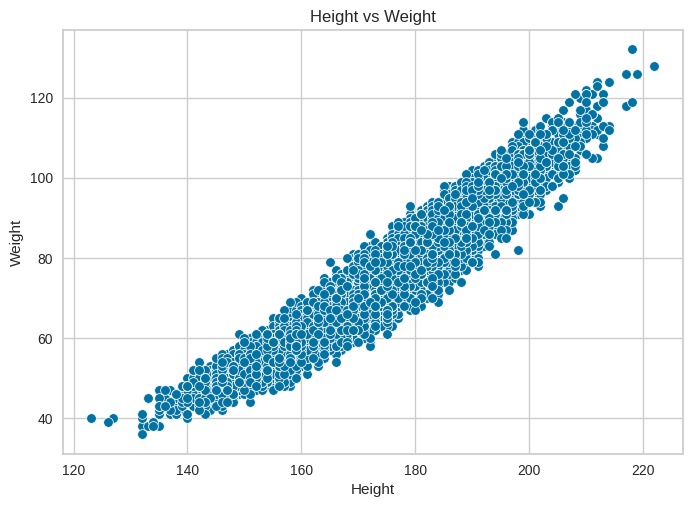

In [11]:
# Let us plot the relationship of height and weight
sns.scatterplot(x=df['Height'], y=df['Weight'])
plt.title('Height vs Weight')
plt.show()

In [12]:
df.corr()["Calories"].sort_values(ascending=False)

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Height        0.017537
User_ID      -0.001661
Name: Calories, dtype: float64

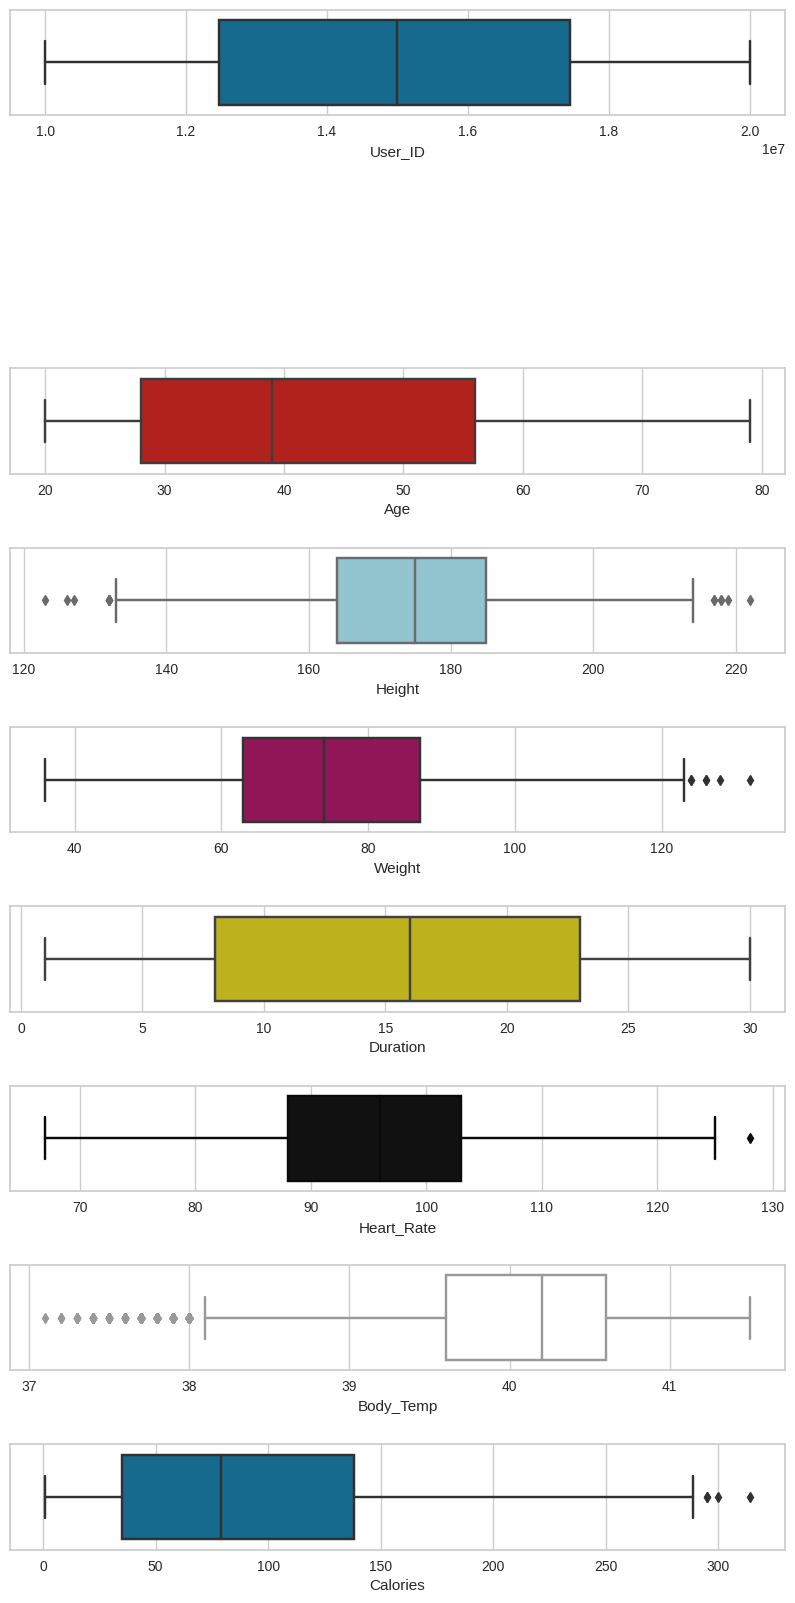

In [13]:
# Outliers for each and every column in the DataFrame

c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(df.columns) , 1 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             # For using axes indeces with one dimention array instead of two dimension
for i , column in zip(range(len(df.columns)) , df.columns):
  try:
    sns.boxplot(data = df , x = column , color = c[i] , ax = axes[i])
  except:
    fig1.delaxes(axes[i])
    continue

In [14]:
# Let us check for null values
df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [15]:
# Let us check for duplicates in this Dataset
df.duplicated().value_counts()

False    15000
dtype: int64

There is no null values and duplicates in this dataset

In [16]:
# Drop the user ID because it has nothing to do with ethe dependant variable
df.drop(columns='User_ID', inplace=True)

# Sample
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


##### Let us split the Dataset into Test Set and Train Set before Preprocessing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=22)
print(f'Shape of train data: {X_train.shape}')
print(f'Shape of test data:{X_test.shape}')

Shape of train data: (12000, 8)
Shape of test data:(3000, 8)


##### The model gives the best results when the distribution of the test and train data are similar. Let us check that

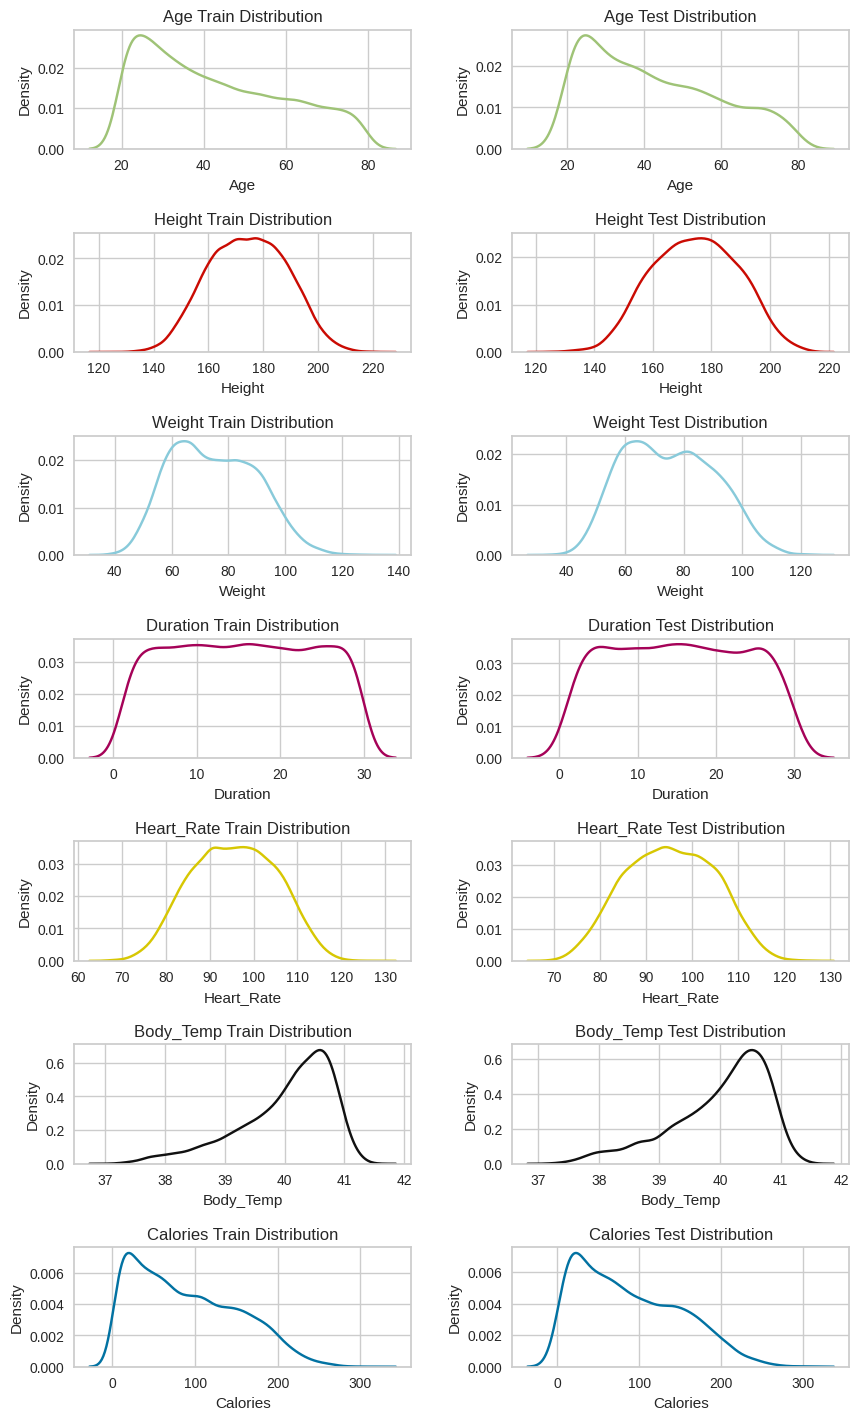

In [18]:
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'b' , 'b']
fig1 , axes = plt.subplots(len(X_train.columns) , 2 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension

for i , column , color in zip(range(0 , len(X_train.columns) * 2 , 2) , X_train.columns , c):
  try:
    axes[i].title.set_text(column + " Train Distribution")
    sns.kdeplot(data = X_train , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue

for i , column , color in zip(range(1 , len(X_train.columns) * 2 , 2) , X_train , c):
  try:
    axes[i].title.set_text(column + " Test Distribution")
    sns.kdeplot(data = X_test , x = column , ax = axes[i] , color = color)
  except:
    fig1.delaxes(axes[i])
    continue
     


##### As we can see, the distributions of features for training and test sets are pretty similar, which is good.

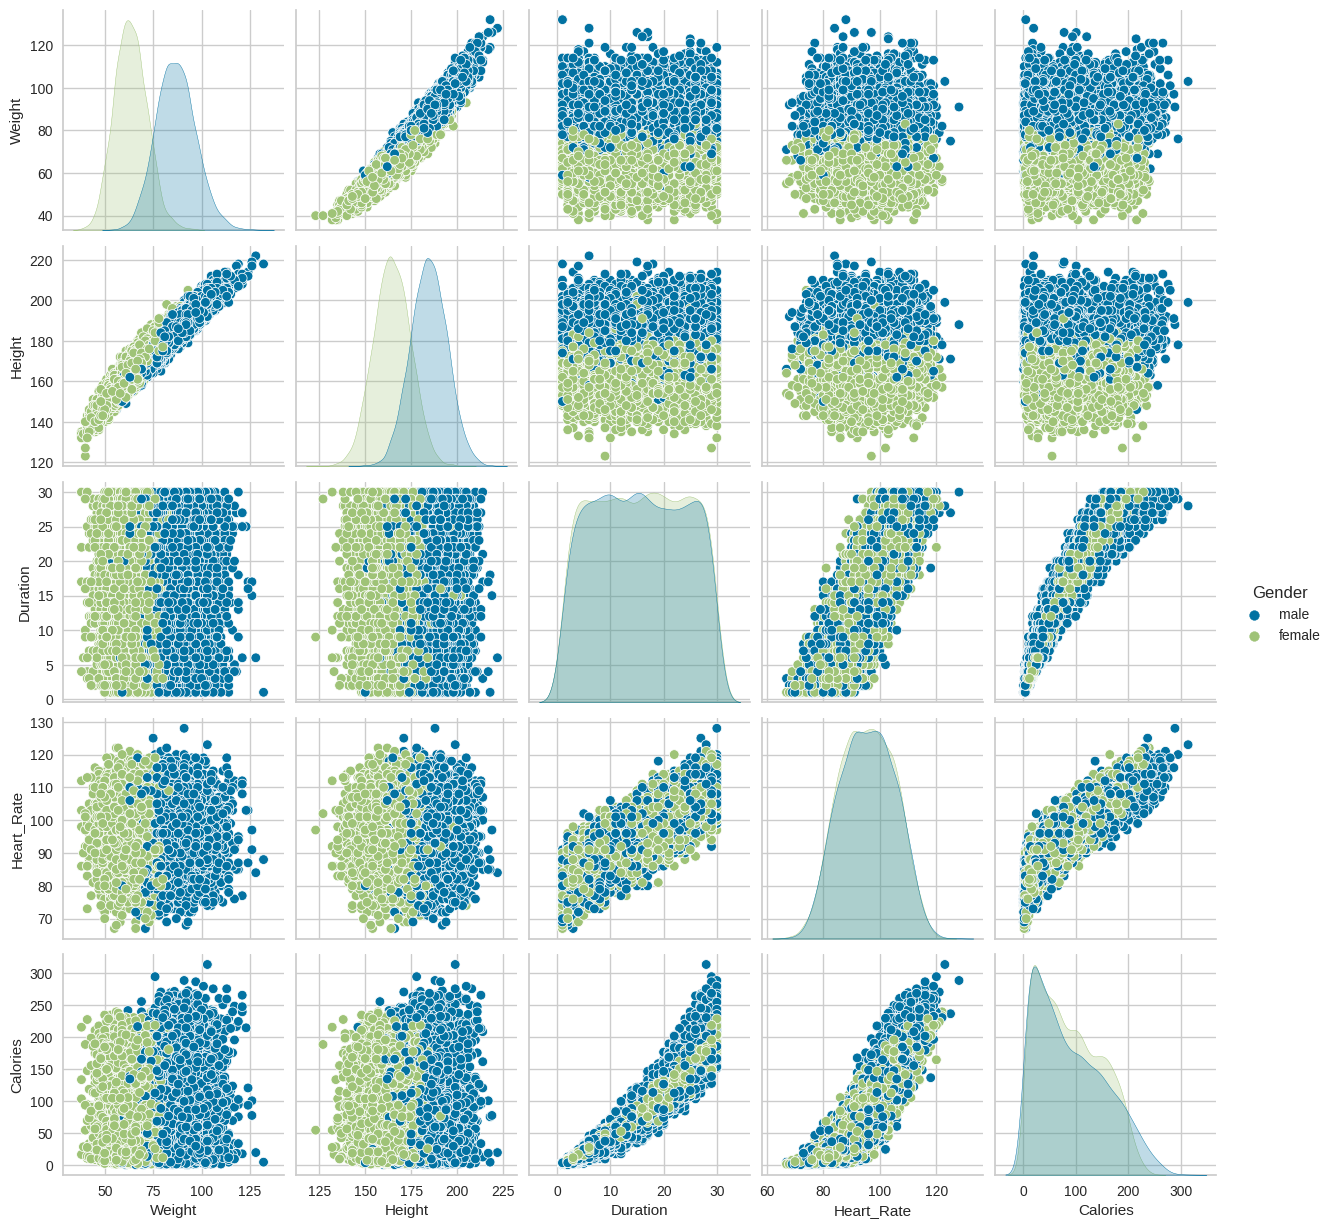

In [19]:
# Pairplot to Explore the relationship of the Features

sns.pairplot(X_train[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")
plt.show()

In [20]:
# Let us consider the Age column

print('Minimum age in dataset is : ' , X_train["Age"].min())
print('Maximum age in dataset is : ' , X_train["Age"].max())

Minimum age in dataset is :  20
Maximum age in dataset is :  79


In [21]:
# We convert these values into Categorical Variable

'''Consider the Range Given below:
    Young - [20,40]
    Middle-Aged - [40,60]
    Old = [60,80]
    '''


age_groups = ["Young" , "Middle-Aged" , "Old"]
X_train["age_groups"] = pd.cut(X_train["Age"] , bins = [20 , 40 ,60 , 80] , right = False , labels = age_groups)
X_train["age_groups"].head()
     

5452    Middle-Aged
28              Old
1031          Young
2489          Young
7711            Old
Name: age_groups, dtype: category
Categories (3, object): ['Young' < 'Middle-Aged' < 'Old']

In [22]:
X_train['age_groups'].value_counts()

Young          5986
Middle-Aged    3496
Old            2518
Name: age_groups, dtype: int64

<Axes: xlabel='age_groups', ylabel='count'>

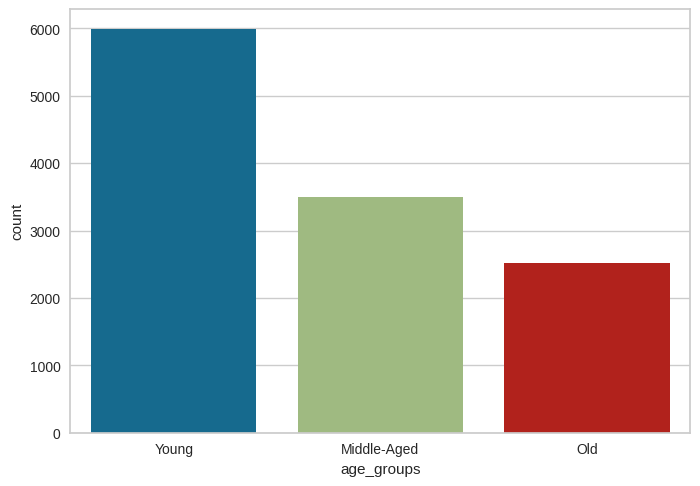

In [23]:
# Let us Visualise the Age Group
# plt.figure()
sns.countplot(data = X_train , x = "age_groups")

In [24]:
# Let us analyse the Age Group with Respect to Calories Burnt using Box Plots 
import plotly.express as px
fig = px.box(X_train , x= "age_groups" , y = "Calories" , color = "Gender")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()
# Plotly Graphs cannot be displayed in github. Consider Running this snippet by yourself

 ##### Older groups outperformed the other groups and young group is the weakest. Male and Female Perfomances are similar.

In [25]:
fig = px.box(X_train , x= "age_groups" , y = "Duration" , color = "Gender")

fig.update_layout(      
    width=750,
    height=450,
)

fig.show()
# Plotly Graphs cannot be displayed in github. Consider Running this snippet by yourself

In [26]:
# Exercise Duration of the Dataset
print("Dataset's median exercise duration in mins: " ,  X_train["Duration"].median())
print("Dataset's mean exercise duration in mins: " ,  X_train["Duration"].mean())

Dataset's median exercise duration in mins:  16.0
Dataset's mean exercise duration in mins:  15.57875


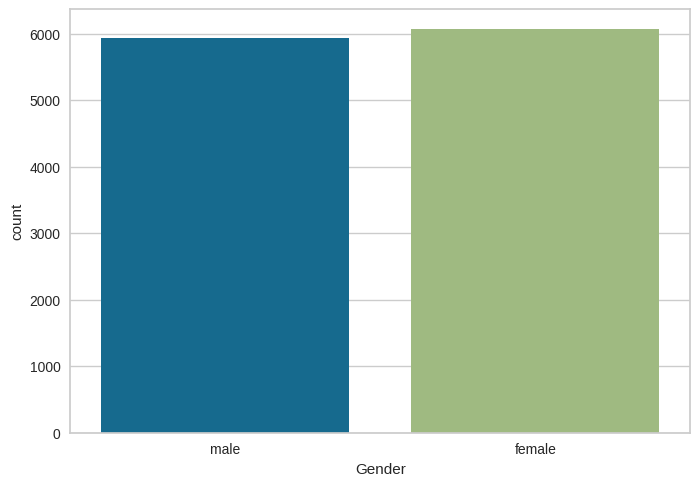

In [27]:
# Gender
sns.countplot(data = X_train , x = "Gender")
plt.show()

##### Both females and males are almost equal in number

In [28]:
# Compare the Exercise duration between male and Female

fig = px.box(X_train , x= "Gender" , y = "Duration")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()

In [29]:
# Compare the Heart Rate between male and Female

fig = px.box(X_train , x= "Gender" , y = "Heart_Rate")

fig.update_layout(      
    width=700,
    height=450,
)

fig.show()
     

##### Let us combine the height and weight columns by calculating Body Mass Index

In [30]:
# The formula for Body Mass Index is : BMI = Weight(kg)/Height*Height(m^2)
# After that, let us categorize the BMI based on the limits given below.

# Adding BMI column to both training and test sets
for data in [X_train , X_test]:         
  data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
  data["BMI"] = round(data["BMI"] , 2)

In [31]:
X_test["BMI"] = X_test["Weight"] / ((X_test["Height"] / 100) ** 2)
X_test["BMI"] = round(X_test["BMI"] , 2)
X_test.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,BMI
2957,male,32,197.0,98.0,26.0,111.0,40.7,188.0,25.25
2269,female,46,187.0,82.0,24.0,98.0,40.7,127.0,23.45
12007,female,46,179.0,67.0,10.0,97.0,39.5,54.0,20.91
13448,male,45,175.0,73.0,26.0,104.0,40.8,163.0,23.84
4275,female,29,164.0,65.0,24.0,106.0,40.8,146.0,24.17


In [32]:
bmi_category = ["Very severely underweight" , "Severely underweight" ,
                "Underweight" , "Normal" ,
                "Overweight" , "Obese Class I" ,
                "Obese Class II" , "Obese Class III"]
X_train["Categorized_BMI"] = pd.cut(X_train["BMI"] , bins = [0 , 15 , 16 , 18.5 , 25 , 30 , 35 , 40 , 50]
                                              , right = False , labels = bmi_category)

# Converting 'categorical' dtype intp 'object' dtype for "Categorized_BMI" column
X_train["Categorized_BMI"] = X_train["Categorized_BMI"].astype("object") 
X_train.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,age_groups,BMI,Categorized_BMI
5452,male,50,196.0,98.0,3.0,87.0,38.4,13.0,Middle-Aged,25.51,Overweight
28,female,62,159.0,59.0,29.0,106.0,41.2,195.0,Old,23.34,Normal
1031,female,37,170.0,71.0,21.0,96.0,40.5,106.0,Young,24.57,Normal
2489,female,20,158.0,54.0,25.0,108.0,40.7,157.0,Young,21.63,Normal
7711,male,79,176.0,83.0,2.0,89.0,38.3,12.0,Old,26.79,Overweight


In [33]:
ds = X_train["Categorized_BMI"].value_counts().reset_index()
ds.columns = ["Categorized_BMI" , "Count"]
ds

,Categorized_BMI,Count
0,Normal,7799
1,Overweight,4201


##### The Train dataset is filled with Normal and Overweight people, where Normal outnumbers Overweight. Seems that underweight and over obese people does not tend to exercise

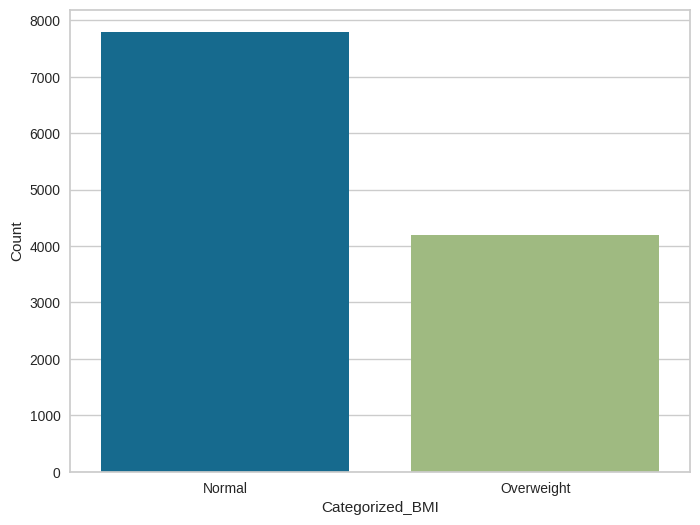

In [34]:
# Let us Visualize them using bins
ds = ds[(ds["Categorized_BMI"] == "Normal") | (ds["Categorized_BMI"] == "Overweight")]
#ds["Categorized_BMI"] = ds["Categorized_BMI"].astype("object")      
#plt.grid()
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count")
plt.show()

In [35]:
# Let us consider this on the basis of gender
ds =X_train[["Gender" ,"Categorized_BMI"]].value_counts().reset_index().sort_values(by = ["Gender" , "Categorized_BMI"])
ds.columns = ["Gender" , "Categorized_BMI" , "Count"]
ds

,Gender,Categorized_BMI,Count
0,female,Normal,5536
3,female,Overweight,528
2,male,Normal,2263
1,male,Overweight,3673


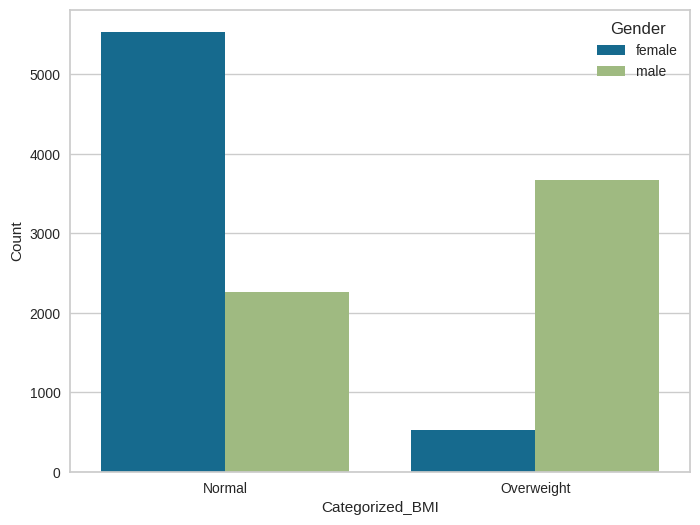

In [36]:
# Let us visualize the results based on gender
plt.rcParams["figure.figsize"] = 8 , 6
sns.barplot(data = ds , x = "Categorized_BMI" , y = "Count" , hue = "Gender")
plt.show()

##### Number of women who is overweight is lesser than that of men, indicating that men are more overweight.
##### Women are more ideal in shape than men.

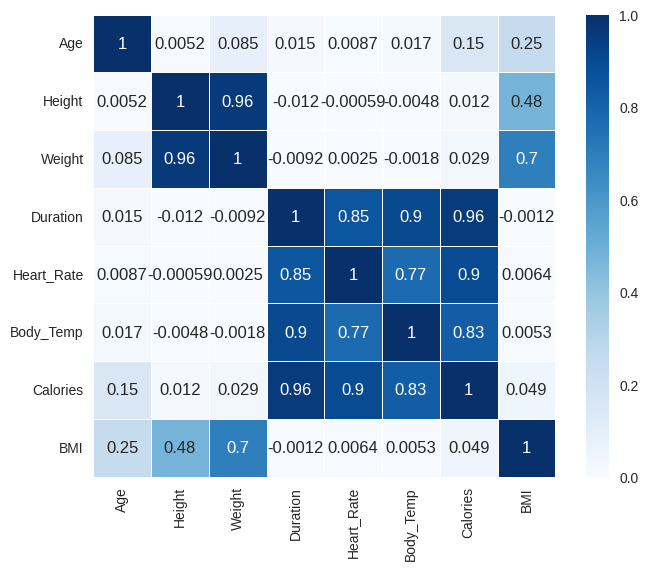

In [37]:
# Let us find the Correlation Matrix
plt.rcParams["figure.figsize"] = 8 , 6
corr = X_train.corr()
sns.heatmap(corr , annot = True , square = True , linewidth = .5 , vmin = 0 , vmax = 1 , cmap = 'Blues')
plt.show()

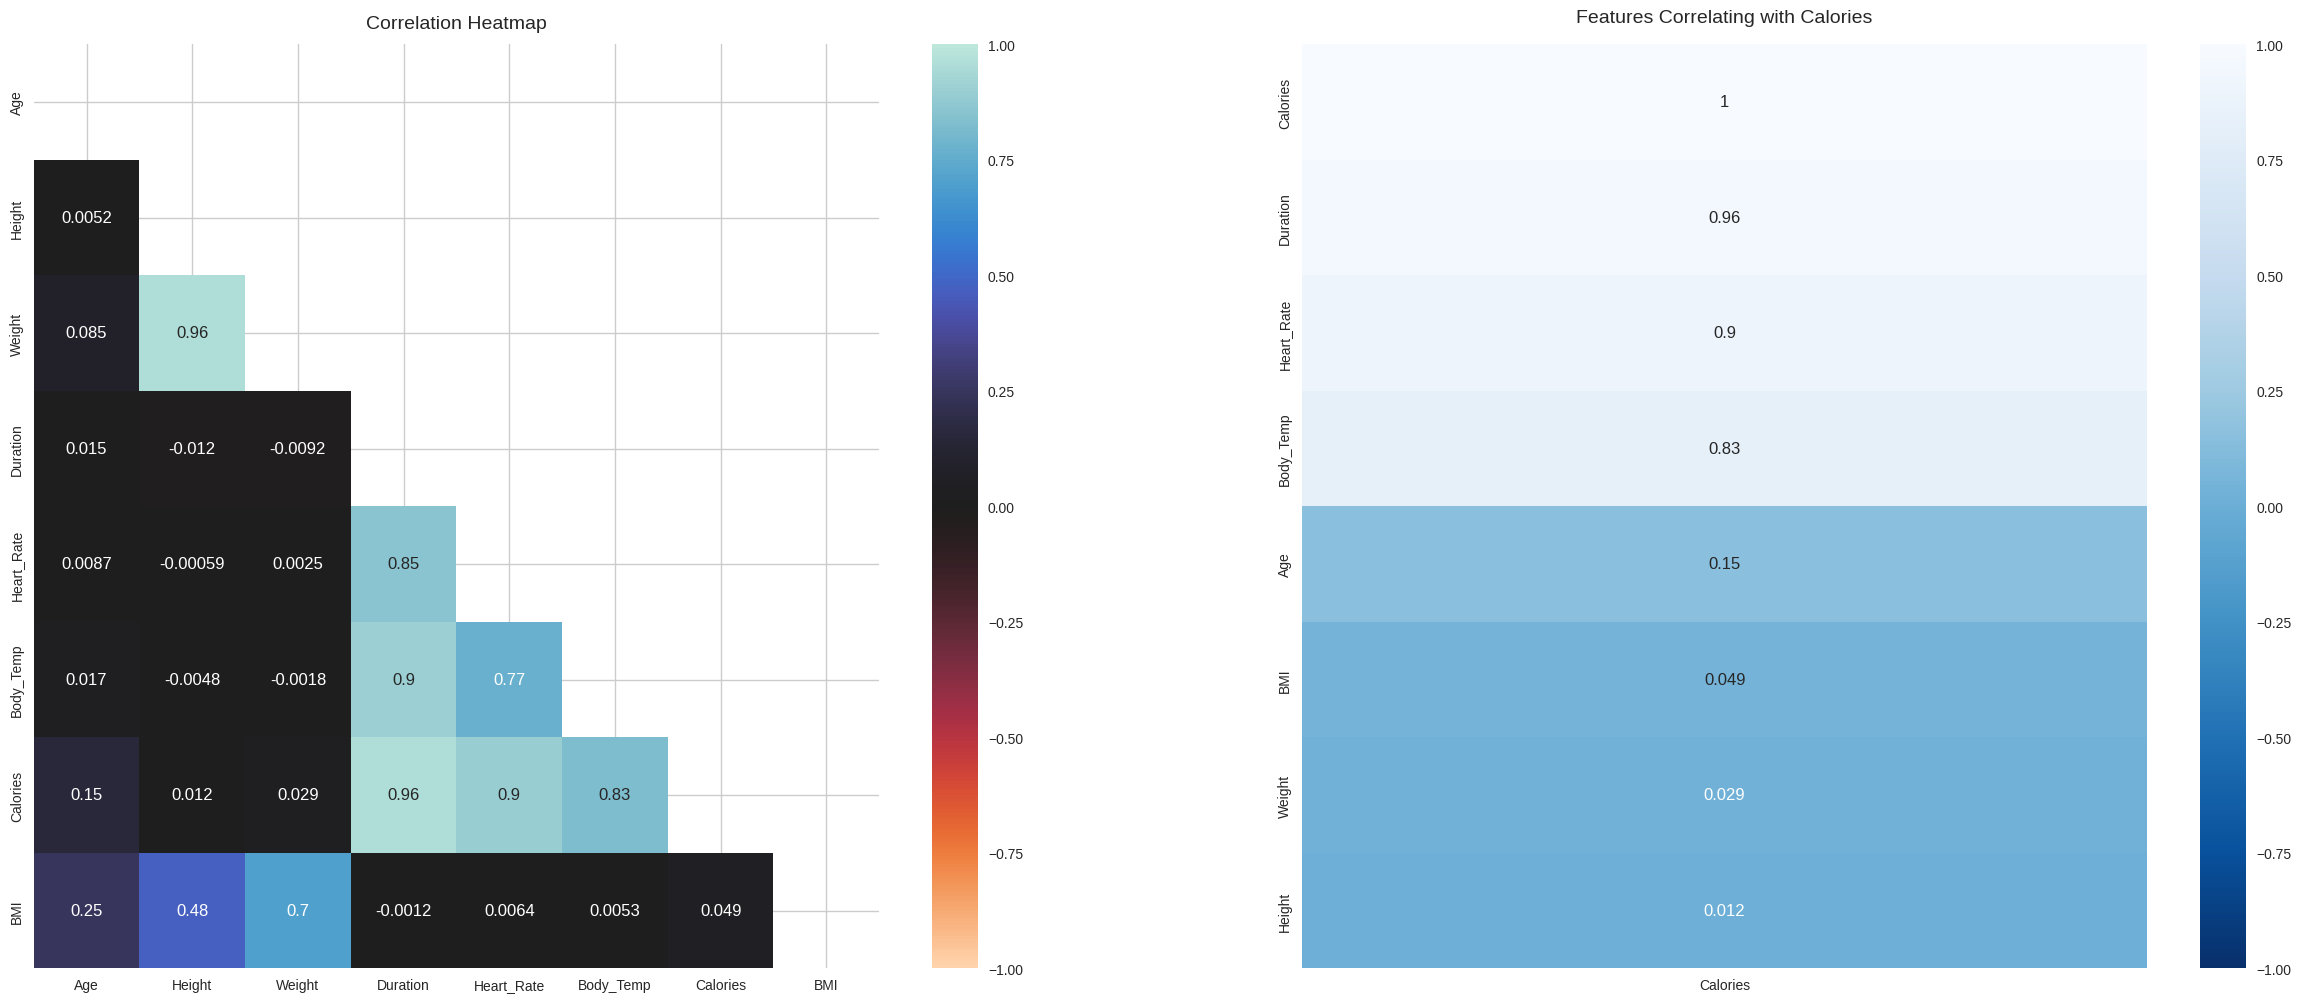

In [38]:
fig, ax = plt.subplots(1,2, figsize=(30,12))  # create a 1 x 2 subplot grid
resign_corr = X_train.corr()  # Calculate correlation of the dataframe

mask = np.triu(resign_corr)
cat_heatmap = sns.heatmap(
    X_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap="icefire_r"
)  # Cornor heatmap of the dataframe correlation

cat_heatmap.set_title(
    "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
)  # sets the title for the heatmap with font size 14 and padding 12


heatmap = sns.heatmap(
    resign_corr[["Calories"]].sort_values(by="Calories", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
    cmap="Blues_r",
)  # create heatmap for features correlating with the dependant varibale 'Calories'

heatmap.set_title(
    "Features Correlating with Calories",
    fontdict={"fontsize": 14},
    pad=16,  # Sets the title for the heatmap with font size 14 and padding 16
)

plt.show()  # Shows the subplot

In [39]:
X_train.corr()["Calories"].sort_values(ascending=False)

Calories      1.000000
Duration      0.955788
Heart_Rate    0.898156
Body_Temp     0.825022
Age           0.153396
BMI           0.048624
Weight        0.029498
Height        0.012354
Name: Calories, dtype: float64

##### Let us consider those features that correlate strongly with the Target Variable. Example, we merged the 2 columns height and weight together using BMI. So let us remove height and weight. If two or more features correlate with each other, let's remove obe feature and keep the rest, By this way, we can imporove the model's efficiency


In [40]:
X_train = X_train[["Gender" , "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
X_test = X_test[["Gender" , "Age" , "BMI"  , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [41]:
# Let us separate Training and testing set
x_train = X_train.drop("Calories" , axis = 1)
y_train = X_train["Calories"]

x_test = X_test.drop("Calories" , axis = 1)
y_test = X_test["Calories"]

In [42]:
# Shape of the Training and Testing set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12000, 7)
(3000, 7)
(12000,)
(3000,)


In [43]:
# Let us Standardize the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                 # Standardising the dataset
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
# Sample
x_train.shape

(12000, 6)

## Regression Pipeline

In [45]:
# Importing the required algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

# Creating instances of random forest and xgboost to use it for Grid search
rf_reg = RandomForestRegressor()
xgb = XGBRegressor()

In [ ]:
# Using GridSearch to find the best hyperparameters
# Finding the parameters that gives us the best r2 score
parameters = [{"n_estimators":[50,100,150,200],
               "criterion":["squared_error", "absolute_error", "friedman_mse", "poisson"]}]

grid_search = GridSearchCV(estimator = rf_reg,
                           scoring = "r2",    
                           param_grid = parameters,
                          )

grid_search.fit(x_train,y_train)
best_r2 = grid_search.best_score_
best_params = grid_search.best_estimator_,
print(f"Best r2 value : {best_r2}\n Best parameters : {best_params}")

# Best r2 value : 0.9961702958911403
# Best parameters : (RandomForestRegressor(criterion='friedman_mse', n_estimators=200),)

In [47]:
linear_model = LinearRegression()
rr = Ridge(alpha=0.01)
lasso_reg = Lasso(alpha=0.01)
enet_reg = ElasticNet(alpha = 0.01)
rf_reg = RandomForestRegressor(n_estimators = 200, criterion = "friedman_mse")
xgb = XGBRegressor(n_estimators = 50, booster = "gbtree", max_depth= 3) 

### Building the Pipeline

In [48]:
regressors = [('Linear Regression', linear_model), ('Ridge Regression', rr),
               ('Lasso Regression', lasso_reg), ('Random Forest', rf_reg),  
                ('ElasticNet', enet_reg),('XGBoost', xgb)]

In [49]:
# Fitting the models using our data
models = []
y_preds = []

for regressor_name, regressor in regressors:

    # Fit regressor to the training set
    models.append(regressor.fit(x_train, y_train))    
   
    # Predict 
    y_preds.append(regressor.predict(x_test))

In [50]:
models

[LinearRegression(),
 Ridge(alpha=0.01),
 Lasso(alpha=0.01),
 RandomForestRegressor(criterion='friedman_mse', n_estimators=200),
 ElasticNet(alpha=0.01),
 XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)]

### Evaluation of the Models to choose the best model

In [51]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    explained_variance_score,
)


# function to evaluate model by using mean_absolute_error, mean_squared_error, root mean_squared_error, r2_score and explained_variance_score
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted) * 100
    accuracy = explained_variance_score(true, predicted) * 100
    return mae, mse, rmse, r2_square, accuracy


regev_df = pd.DataFrame(
    data=[
        [linear_model.__class__.__name__, *evaluate(y_test, y_preds[0])],  # Calls evaluate() -> test set
        
        [rr.__class__.__name__,*evaluate(y_test, y_preds[1])],  # Calls evaluate() -> test set
        
        [lasso_reg.__class__.__name__,*evaluate(y_test, y_preds[2])],  # Calls evaluate() -> test set

        [enet_reg.__class__.__name__,*evaluate(y_test,  y_preds[4])],  # Calls evaluate() -> test set
        
        [rf_reg.__class__.__name__,*evaluate(y_test, y_preds[3])],  # Calls evaluate() -> test set
        
        [xgb.__class__.__name__,*evaluate(y_test, y_preds[5])],  # Calls evaluate() -> test set
    ],
    columns=["Model Name", "MAE", "MSE", "RMSE", "R2 square", "Explained Variance Score"]  # Column names for the dataframe
)

regev_df  # displays dataframe

,Model Name,MAE,MSE,RMSE,R2 square,Explained Variance Score
0,LinearRegression,8.329989,128.570928,11.338912,96.655036,96.655107
1,Ridge,8.329988,128.570950,11.338913,96.655035,96.655106
2,Lasso,8.328422,128.574366,11.339064,96.654946,96.655018
3,ElasticNet,8.350944,129.304283,11.371204,96.635956,96.636062
4,RandomForestRegressor,2.416248,13.257255,3.641051,99.655093,99.655752
5,XGBRegressor,3.433906,21.245985,4.609337,99.447254,99.447557


##### Random Forest Regressor Gives us the best R2 score and Explained variance Score

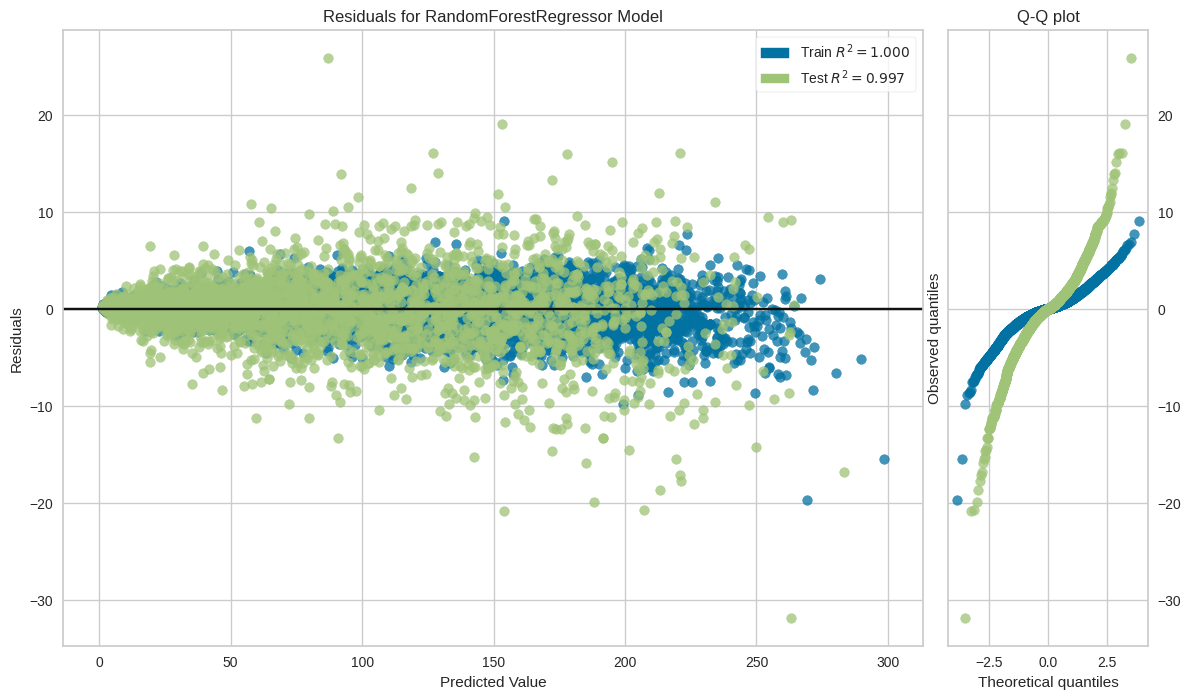

In [102]:
# Let us visualize the Residuals for the Random Forest Regressor Model

from yellowbrick.regressor import ResidualsPlot,PredictionError

plt.figure(figsize=(14, 8))  # Sets figure size as 14 x 8

visualizer = ResidualsPlot(rf_reg, hist=False, qqplot=True)  # Plots residuals plot with qqplot

visualizer.fit(x_train, y_train)  # Fits visualizer

visualizer.score(x_test, y_test)  # Sets score in plot's legend

visualizer.show()  # Shows x_label, y_label, title & legend

plt.show()  # Displays plot

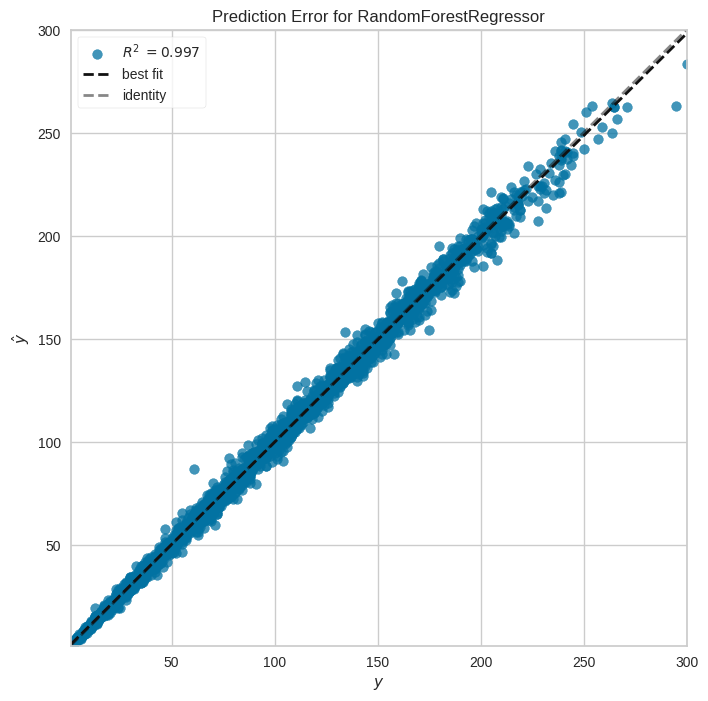

In [55]:
# Let us visualize the Prediction Error in the Random Fores Regressor Model
plt.figure(figsize=(14, 8))  # Sets figure size as 14 x 8

visualizer = PredictionError(rf_reg)  # Plots predict error plot

visualizer.fit(x_train, y_train)  # Fits visualizer

visualizer.score(x_test, y_test)  # Sets score in plot's legend

visualizer.show()  # Shows x_label, y_label, title & legend

plt.show()  # Displays plot

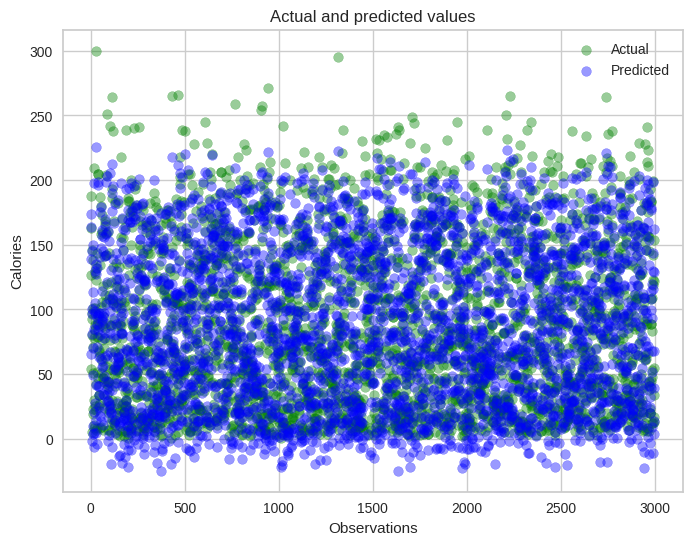

In [59]:
plt.scatter(x = range(0, y_test.size), y=y_test, c = 'green', label = 'Actual', alpha = 0.4)
plt.scatter(x = range(0, y_preds[4].size), y=y_preds[4], c = 'blue', label = 'Predicted', alpha = 0.4)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Calories')
plt.legend()
plt.show()
     

##### As you can see, I visualized the Predictions and Errors of the Random Forest Regressor model. The model performs quite well for both training and testing data.

### Let us save the model.

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [107]:
import os
import joblib

if not os.path.exists("../content/drive/MyDrive/models/"):
    os.mkdir("../content/drive/MyDrive/models/")
# dump trained model as pickle file
joblib.dump(rf_reg, "../content/drive/MyDrive/models/Calories_Predictor_RF.pkl")
print("Successfully Completed !")

Successfully Completed !
